**Simulación de Monte Carlo**

Para que se ejecute el código basta pulsar el símbolo "play" de la izquierda. Para consultar el pdf accesible del gráfico generado por el código hay que dirigirse al último icono de la izquierda, con forma de carpeta, que tendrá el nombre de simulacion_demanda.pdf. Además, tenemos estadísticas descriptivas para cada una de las predicciones en la pantalla más abajo.

Predicción de la demanda:
                Mes 1           Mes 2           Mes 3           Mes 4  \
count  1000000.000000  1000000.000000  1000000.000000  1000000.000000   
mean     14300.144663    14306.054112    14317.890318    14312.084472   
std       4309.050004     4314.303962     4314.393421     4309.743258   
min       2309.277425     1916.225533     1700.337731     2293.795002   
5%        8020.856961     8014.081625     8032.865664     8028.098108   
25%      11213.598347    11211.952542    11217.409103    11219.978641   
50%      13871.439290    13876.795862    13887.865801    13880.872690   
75%      16920.972487    16934.477231    16943.228681    16943.056276   
95%      22046.643459    22063.208652    22088.299480    22055.968525   
max      53673.972406    44923.828754    45476.813126    49519.806230   

                Mes 5           Mes 6           Mes 7           Mes 8  \
count  1000000.000000  1000000.000000  1000000.000000  1000000.000000   
mean     14305.803938   

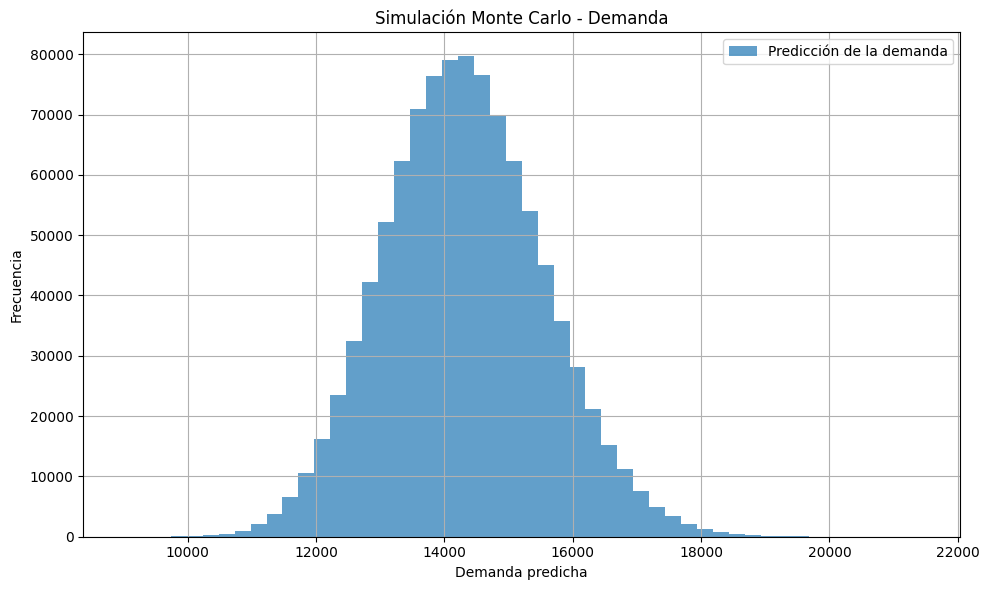

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

#Ponemos los datos a través de una url con el archivo csv
url = "https://raw.githubusercontent.com/AlmudenaCabello/AC_Modelos/refs/heads/main/monthly-car-sales2(in).csv"
df = pd.read_csv(url)
sales_data = df["Sales"].values

#Ajustamos a una distribución gamma
shape, loc, scale = stats.gamma.fit(sales_data, floc=0)
sales_level = stats.gamma(a=shape, scale=scale)

#Hacemos la simulación de Monte Carlo con 1000 simulaciones
number_of_simulations = 1000000
future_months = 12
future_sales_simulations = sales_level.rvs((number_of_simulations, future_months))
future_sales_df = pd.DataFrame(future_sales_simulations, columns=[f"Mes {i+1}" for i in range(future_months)])

#Estadísticas descriptivas
forecast_summary = future_sales_df.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])
print("Predicción de la demanda:")
print(forecast_summary)

#Gráfico
plt.figure(figsize=(10, 6))
plt.hist(future_sales_df.mean(axis=1), bins=50, alpha=0.7, label="Predicción de la demanda")
plt.xlabel("Demanda predicha")
plt.ylabel("Frecuencia")
plt.title("Simulación Monte Carlo - Demanda")
plt.legend()
plt.grid(True)
plt.tight_layout()

#Guardamos como PDF accesible con texto seleccionable
plt.savefig("simulacion_demanda.pdf", format='pdf')
plt.show()
